In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('data/lake_data.csv')
df

,Unnamed: 0,HYBAS_ID,lake_growth,lake_decline,all,year,region,growth_ratio,decline_ratio,water_balance,water_balance_m3
0,0,4060050470,131593.043137,-75959.117647,3.822362e+07,2001,1,0.003443,0.001987,55633.925490,50.070533
1,7024,4060685650,5658.352941,-3593.000000,3.436465e+07,2001,4,0.000165,0.000105,2065.352941,1.858818
2,7023,4060623190,3181.278431,-711.000000,6.995463e+06,2001,4,0.000455,0.000102,2470.278431,2.223251
3,7022,4060607420,1443.686275,-544.811765,2.884887e+06,2001,4,0.000500,0.000189,898.874510,0.808987
4,7021,4060603790,556.109804,-20.000000,7.101565e+05,2001,4,0.000783,0.000028,536.109804,0.482499
...,...,...,...,...,...,...,...,...,...,...,...
11243,3718,4060052910,16481.811765,-7039.780392,6.560509e+06,2019,15,0.002512,0.001073,9442.031373,8.497828
11244,3717,4060052590,13031.019608,-20440.839216,7.190545e+06,2019,15,0.001812,0.002843,-7409.819608,-6.668838
11245,3716,4060052250,25640.062745,-17944.031373,8.516881e+06,2019,15,0.003010,0.002107,7696.031373,6.926428
11246,3468,4060052510,8063.454902,-3603.000000,7.127448e+06,2019,14,0.001131,0.000506,4460.454902,4.014409


In [3]:
shapefile_path = 'data/hydrobasins_lvl6/hybas_as_lev06_v1c.shp'
shapes = gpd.read_file(shapefile_path)

In [4]:
df = gpd.GeoDataFrame(df.merge(shapes, on=['HYBAS_ID',]))

<Axes: >

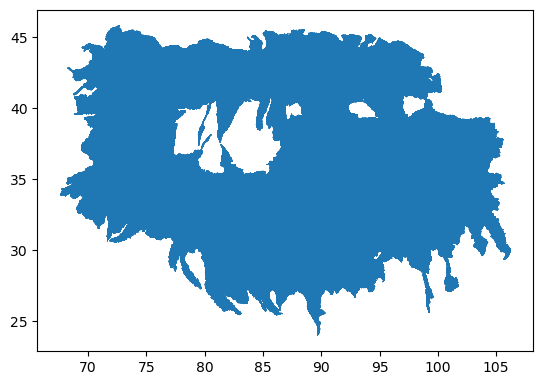

In [5]:
df.plot()

In [6]:
df.columns

Index(['Unnamed: 0', 'HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year',
       'region', 'growth_ratio', 'decline_ratio', 'water_balance',
       'water_balance_m3', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry'],
      dtype='object')

(0.0, 0.1)

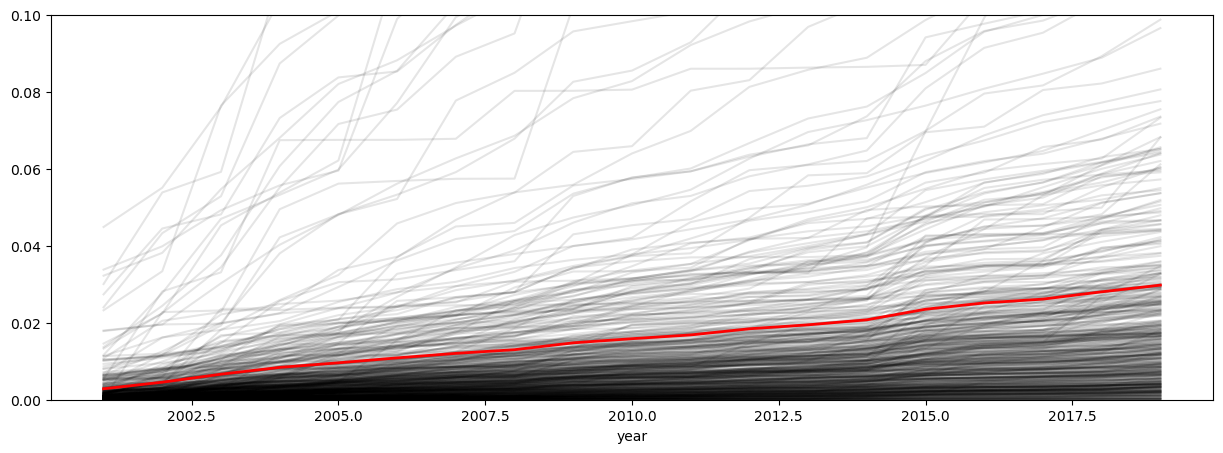

In [7]:
pt = df.pivot_table(index='year', columns='HYBAS_ID', values='growth_ratio')
pt = pt.cumsum()
fig, ax = plt.subplots(figsize=(15, 5))
pt.plot(logy=False, legend=False, alpha=0.1, color='black', ax=ax)
pt.mean(axis=1).plot(ax=ax, color='red', linewidth=2)
ax.set_ylim(0, 0.1)

<Axes: >

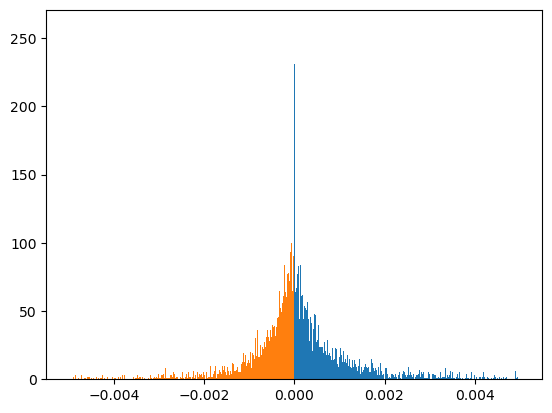

In [8]:
fig, ax = plt.subplots()

df.growth_ratio.hist(bins=np.linspace(0,0.005, 1000), ax=ax, grid=False)
(df.decline_ratio*(-1)).hist(ax=ax, bins=np.linspace(-0.005, 0, 1000), grid=False)

<Axes: >

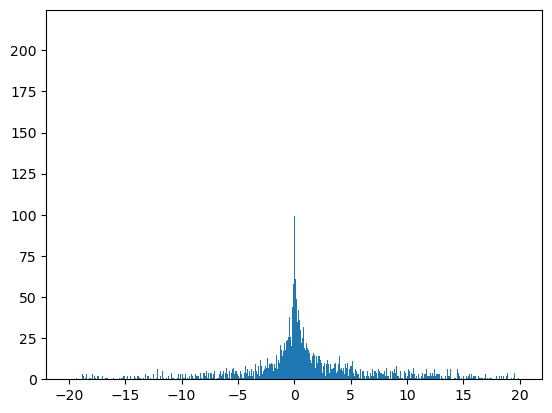

In [13]:
df.water_balance_m3.hist(bins=np.linspace(-20, 20, 2000), grid=False)

In [64]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.6 MB/s eta 0:00:00


/opt/homebrew/anaconda3/envs/tblakes/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


Text(0.5, 1.0, '2007')

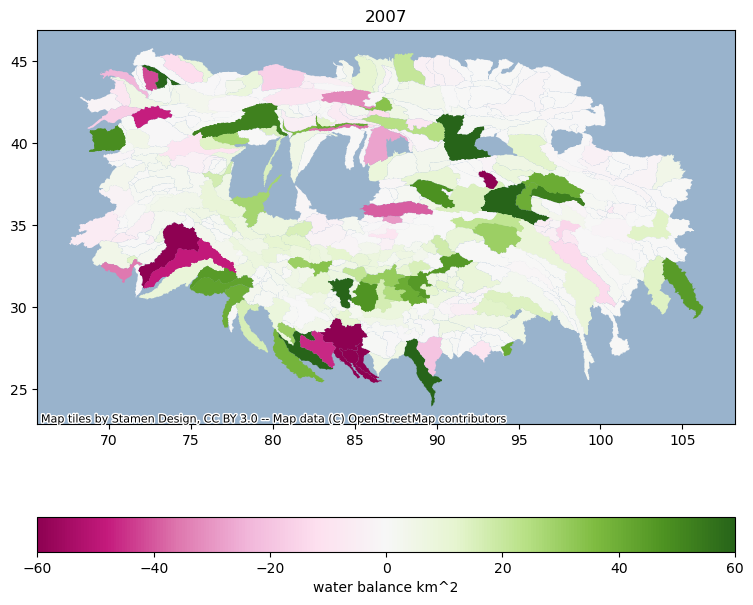

In [98]:
import contextily as cx

year = 2007

fig, ax = plt.subplots(figsize=(9, 8))
cbar = df[df.year==year].plot('water_balance_m3', cmap='PiYG', legend=True, ax=ax, vmin=-60, vmax=60
                             ,legend_kwds={'orientation':'horizontal', 'label':'water balance km^2'})
cx.add_basemap(ax)
ax.set_title(str(year))

In [62]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equatoria